In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

%matplotlib inline

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

/Users/petershi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
## loading the dataset
dataset_train = pd.read_csv('train.csv')
dataset_eval = pd.read_csv('test.csv')

In [3]:
## inspecting the variables with the highest correlation to SalePrice
CorrelationMatrix = dataset_train.corr()
CorrelationMatrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

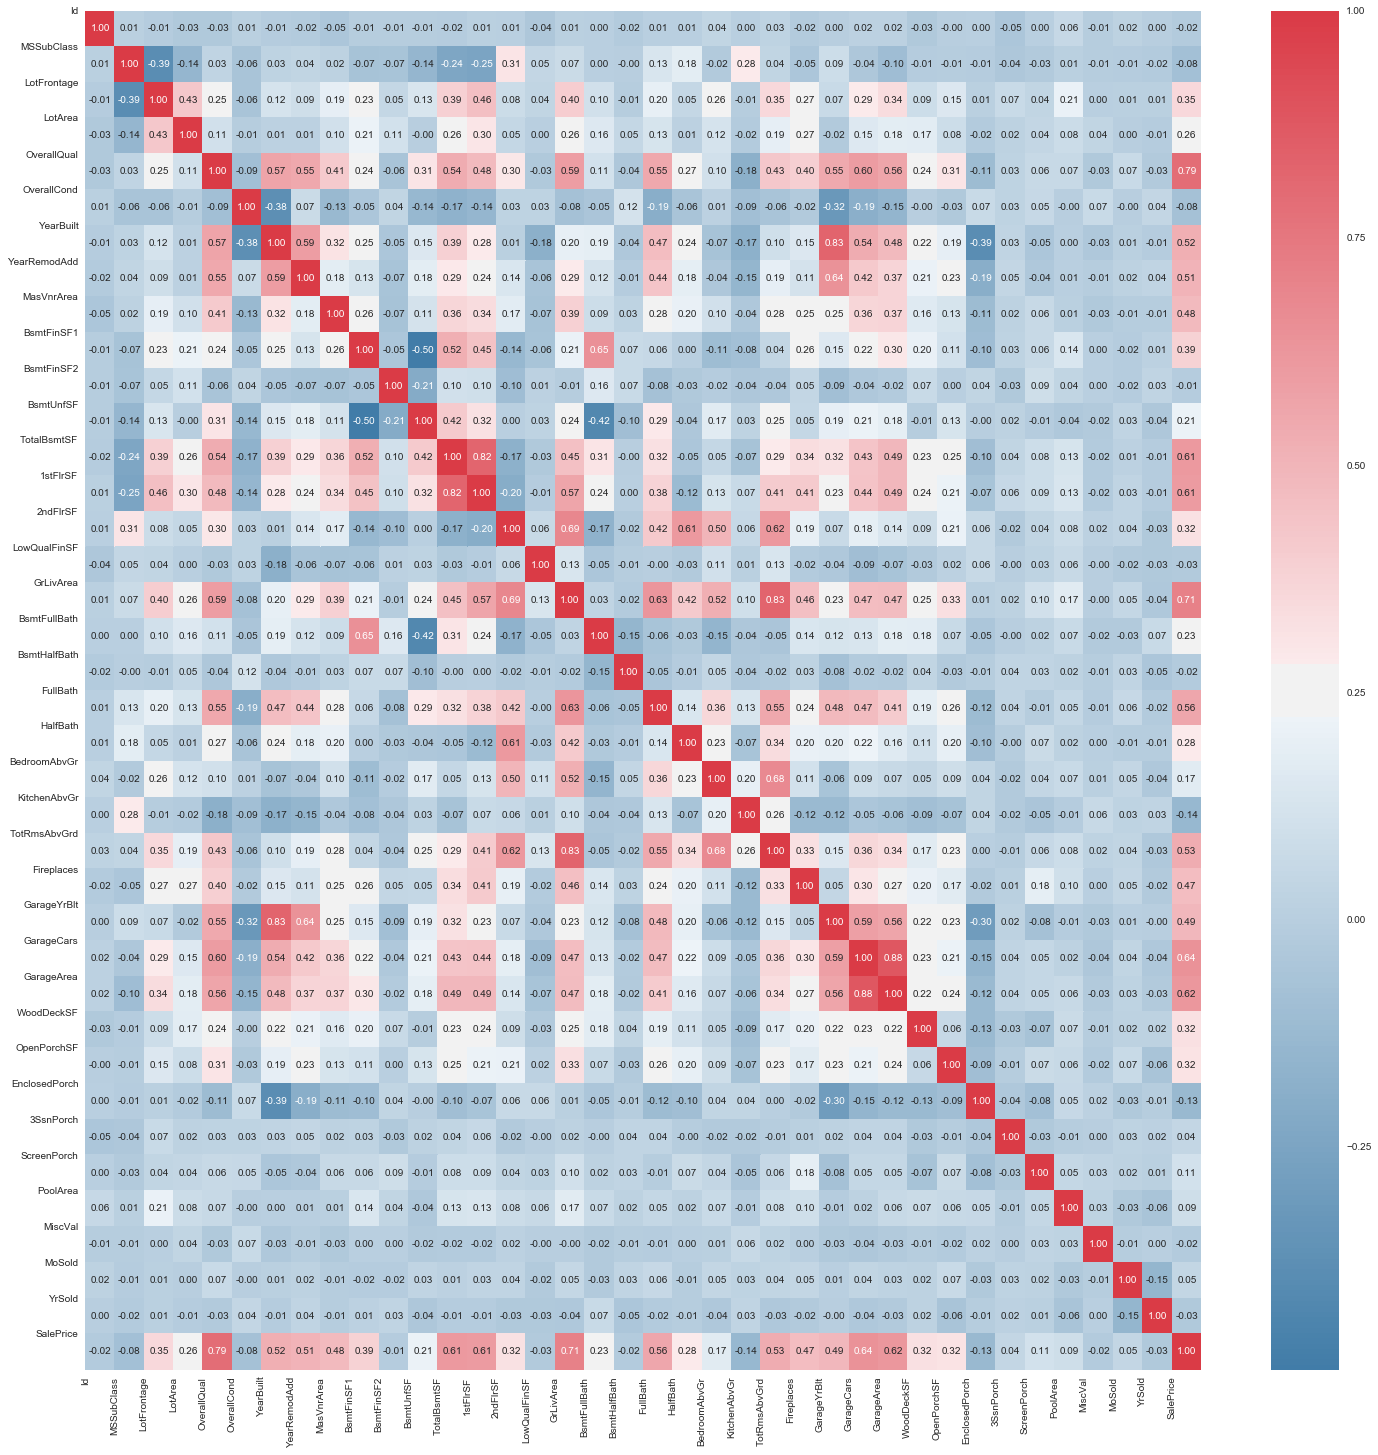

In [4]:
## heatmap: a visual representation of the correlation

fig, ax = plt.subplots(figsize=(25, 25))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(240, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(CorrelationMatrix, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(CorrelationMatrix.columns)), CorrelationMatrix.columns);
#Apply yticks
plt.yticks(range(len(CorrelationMatrix.columns)), CorrelationMatrix.columns)
#show plot
plt.show()

### Feature extraction:

From the plot we can see that the most prominent features are (setting the cutoff points as 0.5 correlation)

1. OverallQual      0.790982
2. GrLivArea        0.708624
3. GarageCars       0.640409
4. GarageArea       0.623431
5. TotalBsmtSF      0.613581
6. 1stFlrSF         0.605852
7. FullBath         0.560664
8. TotRmsAbvGrd     0.533723
9. YearBuilt        0.522897
10. YearRemodAdd     0.507101


Now we inspect these features seperately. For **categorical** values, we plot the **boxplots**; for **quantitative** values, we plot the **scatterplots**


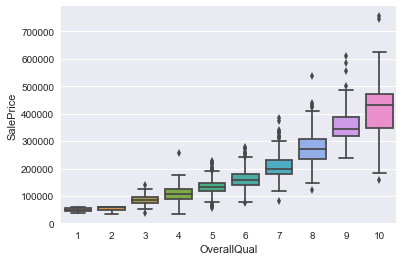

In [5]:
# OverallQual
feature = 'OverallQual'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)


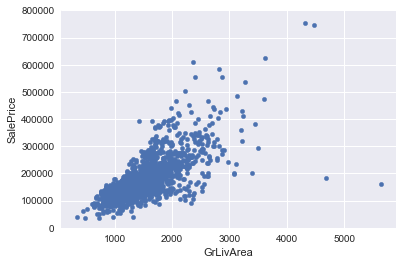

In [6]:
# GrLivArea
feature = 'GrLivArea'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))


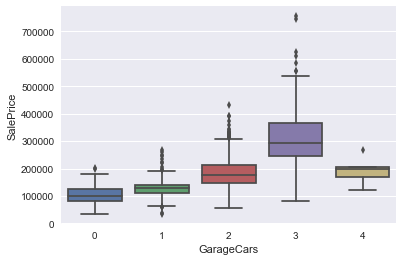

In [7]:
# GarageCars
feature = 'GarageCars'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
plot = sns.boxplot(x=feature, y="SalePrice", data=data)


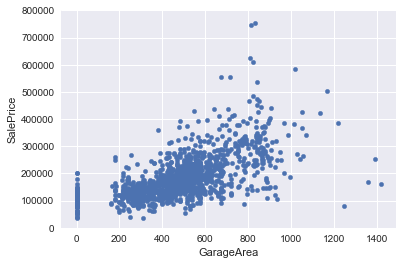

In [8]:
# GarageArea

feature = 'GarageArea'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

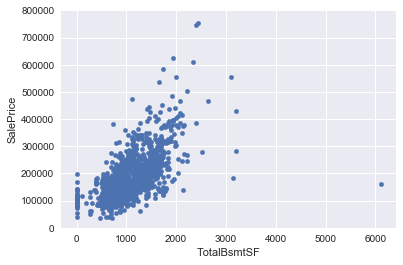

In [9]:
# TotalBsmtSF

feature = 'TotalBsmtSF'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

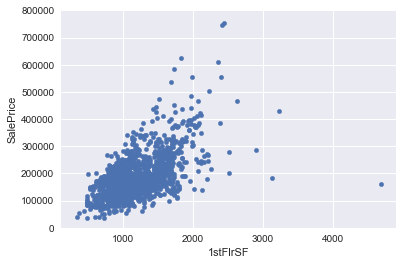

In [10]:
# 1stFlrSF

feature = '1stFlrSF'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)
data.plot.scatter(x=feature, y="SalePrice", ylim=(0, 800000))

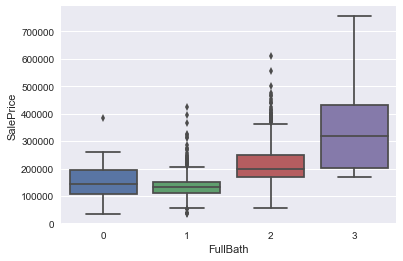

In [11]:
# FullBath
feature = 'FullBath'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

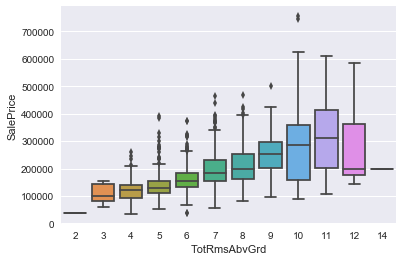

In [12]:
# TotRmsAbvGrd
feature = 'TotRmsAbvGrd'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

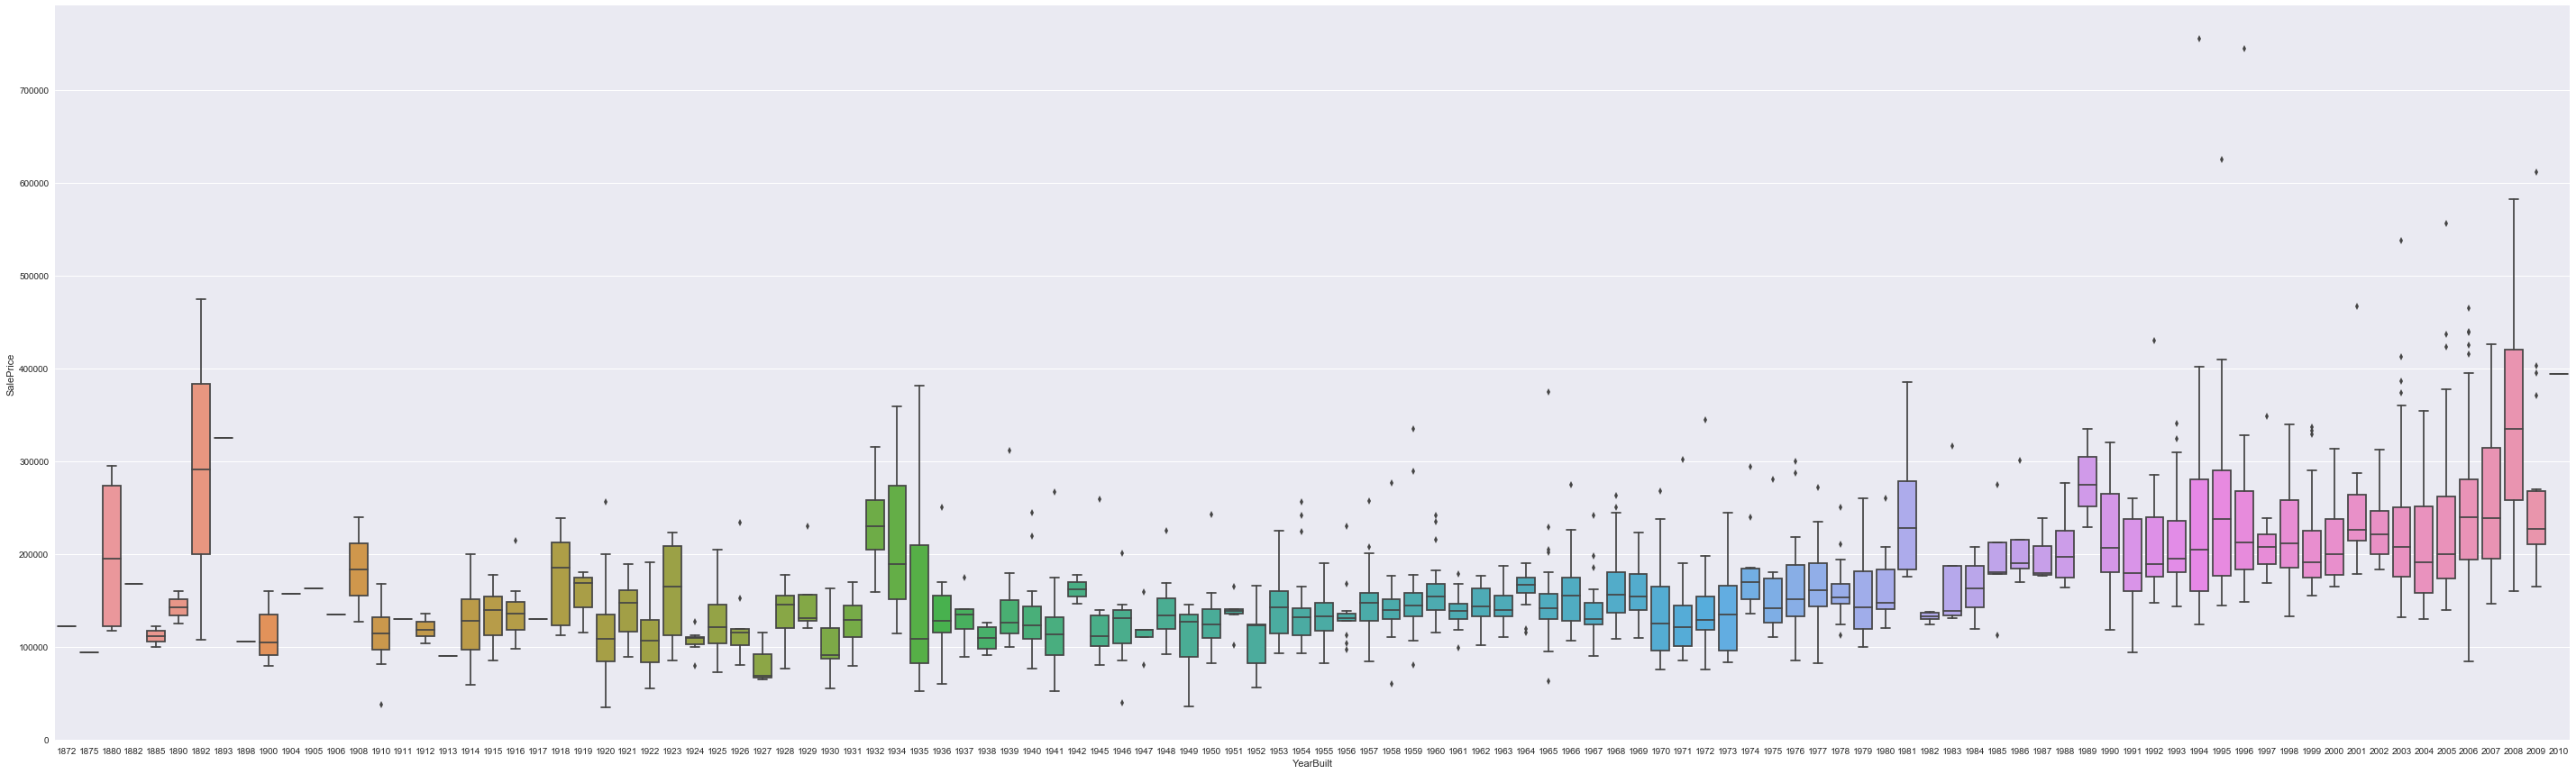

In [13]:
# YearBuilt
feature = 'YearBuilt'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

f, _ = plt.subplots(figsize=(50, 15))

plot = sns.boxplot(x=feature, y="SalePrice", data=data)

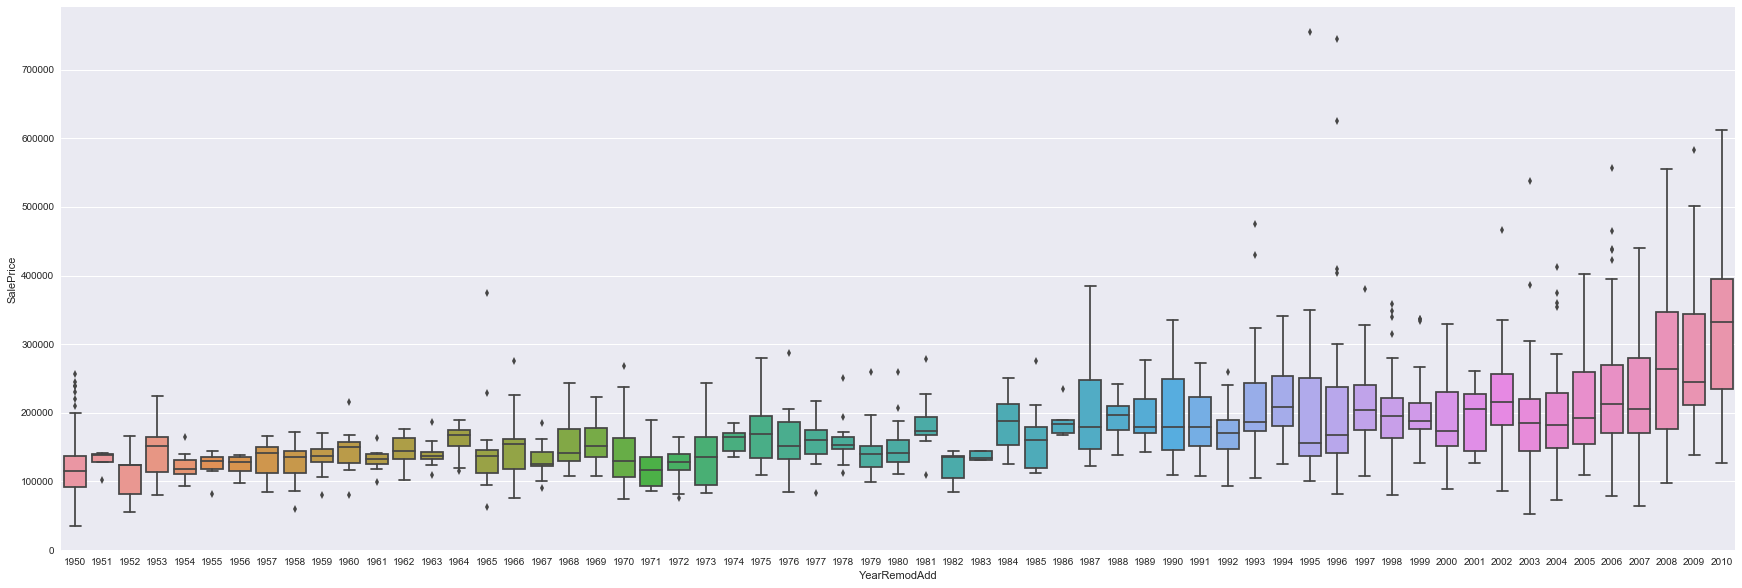

In [14]:
# YearRemodAdd
feature = 'YearRemodAdd'
data = pd.concat([dataset_train['SalePrice'], dataset_train[feature]], axis=1)

f, _ = plt.subplots(figsize=(30, 10))

plot = sns.boxplot(x=feature, y="SalePrice", data=data)


Based on the above observation, we can see that: 

Although SalePrice increases slightly with **YearBuilt** and **YearRemodAdd**, they do not exhibit strong relationship with the **SalePrice**, hence we can exclude them from our model analysis.
The other 8 variables are highly correlated with the **SalePrice**

Therefore we are left with only 8 features and below is a new version of the plot

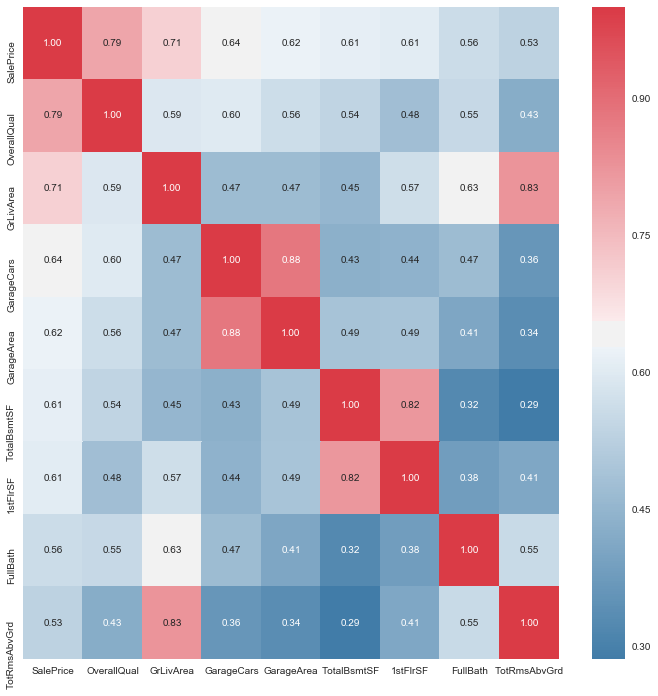

In [15]:
features = CorrelationMatrix.nlargest(9, "SalePrice")["SalePrice"].index
CorrelationMatrices = np.corrcoef(dataset_train[features].values.T)

fig, ax = plt.subplots(figsize=(12, 12))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(240, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(CorrelationMatrices, cmap=colormap, annot=True, fmt=".2f", yticklabels=features.values, xticklabels=features.values)


## From this refined plot, we can see that 

**GrLivArea** correlates with **TotRmsAbvGrd**; **GarageCars** correlates with **GarageArea**, and **TotalBsmtSF** correlates with **1stFlrSF**

Now we check for the *homoscedasticity* assumptions for the quantitive variables.

Before that, we need to check if there are any *<u>missing values</u>* in our features.



In [16]:
dataset_train[features].isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
dtype: int64

The good news is that there are no missing values in our selected features. 

We can proceed to examine the distribution of quantitive variables.

In [17]:
dataset_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [18]:
print("Skewness: %f" % dataset_train['SalePrice'].skew())
print("Kurtosis: %f" % dataset_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


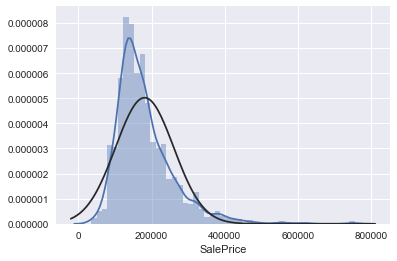

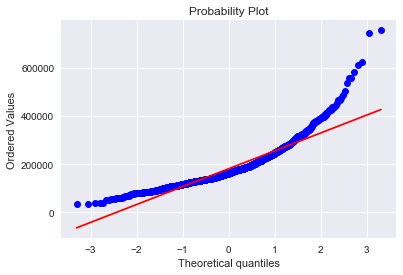

In [19]:
sns.distplot(dataset_train['SalePrice'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['SalePrice'], plot=plt)


Based on the observation of the quantiles, skewness and plots, we can see that the distribuition of the SalePrice is not normal, and a ***log transformation*** is required. 



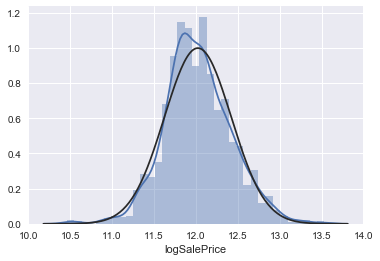

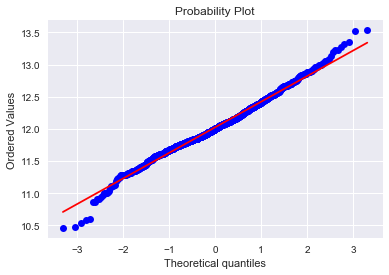

In [20]:
dataset_train['logSalePrice'] = np.log(dataset_train['SalePrice'])

sns.distplot(dataset_train['logSalePrice'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(dataset_train['logSalePrice'], plot=plt)

The ditribution for the logSalePrice follows more normal distribution.


Now we inspect the remaining quantitative variables, and perform transformation as neccessary.

- GrLivArea
- GarageArea
- TotalBsmtSF
- 1stFlrSF

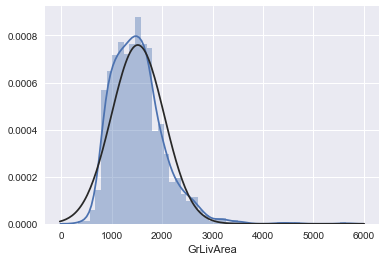

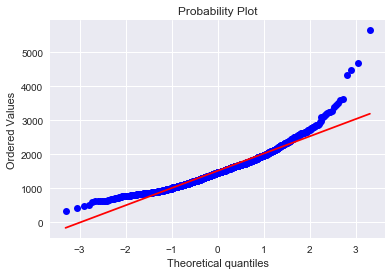

In [21]:
sns.distplot(dataset_train['GrLivArea'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['GrLivArea'], plot=plt)


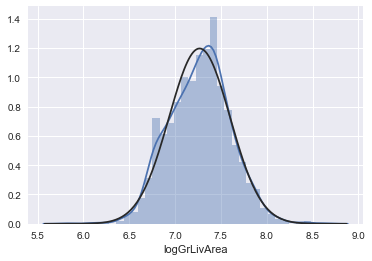

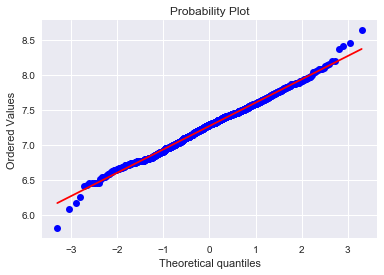

In [22]:
dataset_train['logGrLivArea'] = np.log(dataset_train['GrLivArea'])

sns.distplot(dataset_train['logGrLivArea'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train['logGrLivArea'], plot=plt)

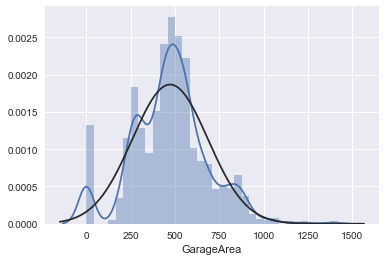

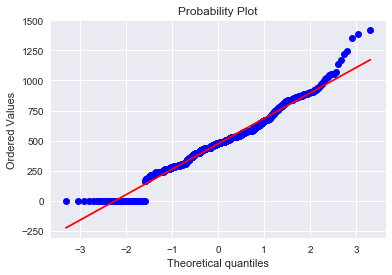

In [23]:
sns.distplot(dataset_train['GarageArea'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['GarageArea'], plot=plt)


The result of transformation follows mostly normal distribution, except for some the outliers. 

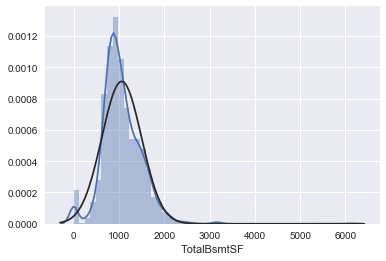

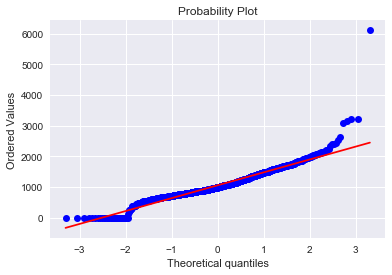

In [24]:
sns.distplot(dataset_train['TotalBsmtSF'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['TotalBsmtSF'], plot=plt)


The catch here for **TotalBsmtSF** is that some of its values are 0, and we cannot dicrectly apply log-transformation. It is therefore necessary to treat them seperately. 

/Users/petershi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


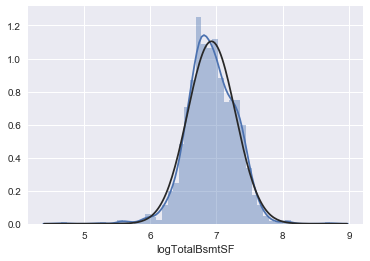

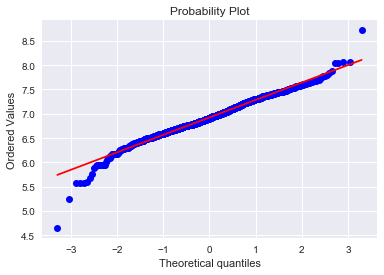

In [25]:
dataset_train['logTotalBsmtSF'] = 0 
dataset_train.loc[dataset_train['TotalBsmtSF']>0,'logTotalBsmtSF'] = np.log(dataset_train['TotalBsmtSF'])


sns.distplot(dataset_train[dataset_train['TotalBsmtSF']>0]['logTotalBsmtSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train[dataset_train['TotalBsmtSF']>0]['logTotalBsmtSF'], plot=plt)



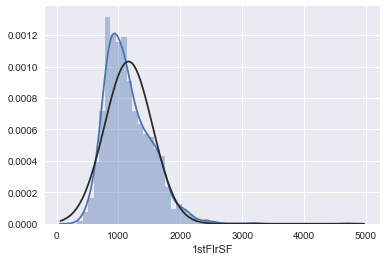

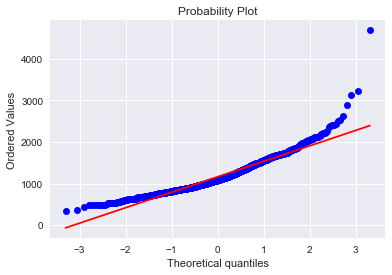

In [26]:
sns.distplot(dataset_train['1stFlrSF'], fit=stats.norm)

fig = plt.figure()
res = stats.probplot(dataset_train['1stFlrSF'], plot=plt)

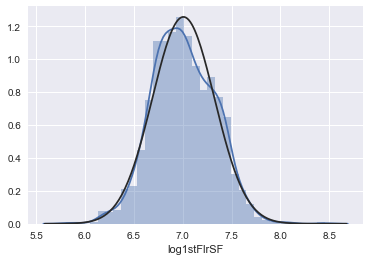

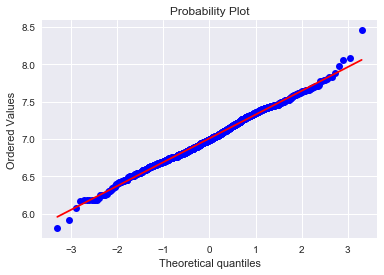

In [27]:
dataset_train['log1stFlrSF'] = np.log(dataset_train['1stFlrSF'])

sns.distplot(dataset_train['log1stFlrSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(dataset_train['log1stFlrSF'], plot=plt)

After we have performed all the transformations, we are going to examine the **homoscedasticity** assumption in these quantatitive variables. 



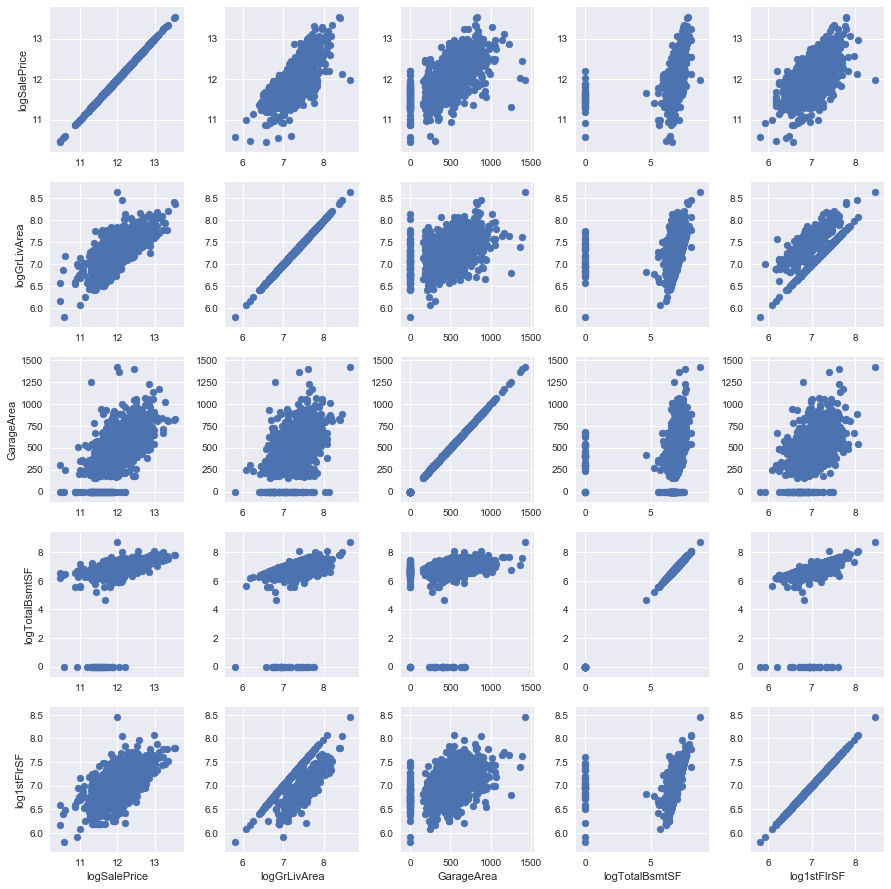

In [28]:
quantatitive_variables = ['logSalePrice', 'logGrLivArea', 'GarageArea', 'logTotalBsmtSF', 'log1stFlrSF']

plot = sns.PairGrid(dataset_train[quantatitive_variables])

plot = plot.map(plt.scatter)


From the plot, we can see that homoscedasticity is fulfilled, as long as we treat the 0 values differently in the logTotalBsmtSF. 

## Model Training

In [29]:
variables = ['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'logGrLivArea', 'GarageArea', 'logTotalBsmtSF', 'log1stFlrSF']

X = dataset_train[variables].values
y = dataset_train['logSalePrice'].values

## perform feature scaling for the X and y values
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)

y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.33, random_state = 0)

MSE for Linear Regression is: 0.175289752868
MSE for Bayesian Ridge is: 0.175149414859
MSE for Supoort Vector Regression is: 0.154578359311
MSE for Decision Tree Regressor is: 0.215761783446
MSE for Random Forest Regressor is: 0.158457784779


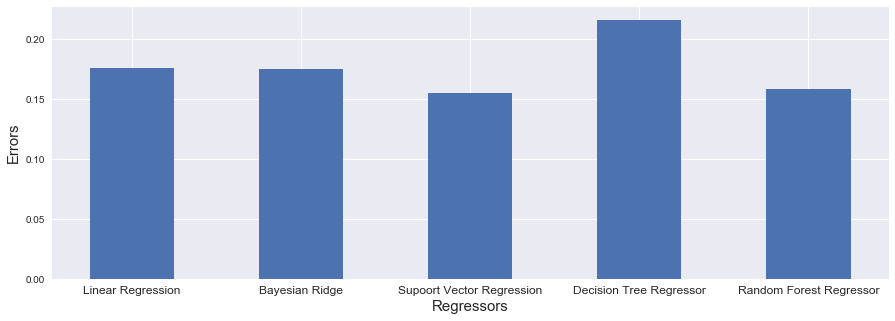

In [38]:
## we compare more than one regressor, in order to obtain the optimal model

regressors = {
        'Linear Regression': LinearRegression(),
        'Bayesian Ridge': BayesianRidge(),
        'Supoort Vector Regression': SVR(),
        'Decision Tree Regressor': DecisionTreeRegressor(), 
        'Random Forest Regressor':RandomForestRegressor(n_estimators = 500, random_state = 0)
       }

errors = []

for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    error = np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_test), sc_y.inverse_transform(y_pred)))
    print("MSE for " + name + " is: " + str(error))
    errors.append(error)


x_pos = [i for i, _ in enumerate(regressors.keys())]

plt.figure(figsize=(15, 5))
plt.bar(x_pos, errors, width=0.5)
plt.xlabel("Regressors", fontsize=15)
plt.ylabel("Errors", fontsize=15)
plt.xticks(x_pos, regressors.keys(), fontsize=12)
plt.show()


We can see that our Supoort Vector Regression has the best performance, and hence adopt it.

### Applying the model to submission sets


The first step in applying our model to the submission set is to exmaine the exisistence of any <u>*missing values*</u>.

In [31]:
dataset_eval[dataset_eval[features[1:]].isnull().any(axis=1)][features[1:]]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd
660,4,896,1.0,280.0,NaN,896,1,4
1116,5,1828,NaN,NaN,859.0,942,2,6


As we can see, there are some misssing values, so we cannot apply the model directly. Yet since the number of missing values is small, we can simply adopt the mean method. 

In [32]:
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')

imputer.fit(dataset_eval[features[1:]])

dataset_eval[features[1:]] = imputer.transform(dataset_eval[features[1:]])

In [33]:
# making sure no more missing values
dataset_eval[features[1:]].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
dtype: int64

In [34]:
# performing transformation for the variables as we did in the training set

dataset_eval['logGrLivArea'] = np.log(dataset_eval['GrLivArea'])
dataset_eval['logTotalBsmtSF'] = 0 
dataset_eval.loc[dataset_eval['TotalBsmtSF']>0,'logTotalBsmtSF'] = np.log(dataset_eval['TotalBsmtSF'])
dataset_eval['log1stFlrSF'] = np.log(dataset_eval['1stFlrSF'])

/Users/petershi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [35]:
X_eval = dataset_eval[variables].values

sc_X = StandardScaler()

X_eval = sc_X.fit_transform(X_eval)


In [36]:
# regressor = RandomForestRegressor(n_estimators = 300, random_state = 3)
regressor = SVR()
# using the entire training set will improve the model
regressor.fit(X_scaled, y_scaled)


# making predictions and save the result to csv

log_predictedy = sc_y.inverse_transform(regressor.predict(X_eval))

submission_df = pd.DataFrame(data = {"Id": list(range(1461, 2920)), "SalePrice": np.exp(log_predictedy)})

submission_df.to_csv("submission.csv", sep=',', encoding='utf-8', index=False)
